In [4]:
! pip install tiktoken
! pip install matplotlib
! pip install wordcloud
! pip install pandas
! pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [44]:
import pandas as pd

df = pd.read_csv('dataset/prompts.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   act       220 non-null    object
 1   prompt    220 non-null    object
 2   for_devs  220 non-null    bool  
dtypes: bool(1), object(2)
memory usage: 3.8+ KB


In [7]:
act_count = df['act'].value_counts()
for_dev_count = df['for_devs'].value_counts()
print(act_count)
print(for_dev_count)

act
Chess Player                2
Life Coach                  2
Python Interpreter          2
Prompt Generator            2
Ethereum Developer          1
                           ..
Journal Reviewer            1
DIY Expert                  1
Social Media Influencer     1
Socrat                      1
Explainer with Analogies    1
Name: count, Length: 216, dtype: int64
for_devs
False    167
True      53
Name: count, dtype: int64


In [26]:
len(df["act"])


220

In [9]:
len(df["act"].unique())

216

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
null_values = df.isnull().sum()
print(null_values)

act         0
prompt      0
for_devs    0
dtype: int64


In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


In [13]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mandipdhakal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mandipdhakal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mandipdhakal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
target_df = df[df['for_devs'] == True]

In [15]:
target_words = [
    word.lower()
    for prompt in target_df['prompt']
    for word in word_tokenize(prompt)
    if word.isalnum() and word.lower() not in stopwords.words('english')
]

target_word_counts = Counter(target_words)
print(target_word_counts)

Counter({'want': 63, 'act': 48, 'provide': 43, 'code': 39, 'first': 39, 'write': 29, 'reply': 27, 'explanations': 23, 'include': 19, 'need': 18, 'text': 18, 'use': 18, 'output': 17, 'like': 17, 'data': 15, 'software': 15, 'request': 14, 'commands': 13, 'give': 13, 'inside': 12, 'language': 12, 'type': 11, 'nothing': 11, 'help': 11, 'project': 11, 'prompt': 11, 'input': 11, 'terminal': 10, 'one': 10, 'else': 10, 'command': 10, 'table': 10, 'system': 10, 'example': 10, 'create': 10, 'developer': 9, 'block': 9, 'app': 9, 'ask': 9, 'expert': 9, 'tell': 8, 'something': 8, 'curly': 8, 'new': 8, 'information': 8, 'list': 8, 'problem': 8, 'examples': 8, 'ensure': 7, 'unless': 7, 'based': 7, 'column': 7, 'details': 7, 'job': 7, 'come': 7, 'could': 7, 'specific': 7, 'company': 7, 'related': 7, 'explain': 7, 'concepts': 7, 'model': 7, 'solutions': 7, 'bullet': 7, 'test': 7, 'make': 7, 'creating': 6, 'message': 6, 'including': 6, 'please': 6, 'relevant': 6, 'understanding': 6, 'show': 6, 'unique':

In [16]:
word_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(target_word_counts)

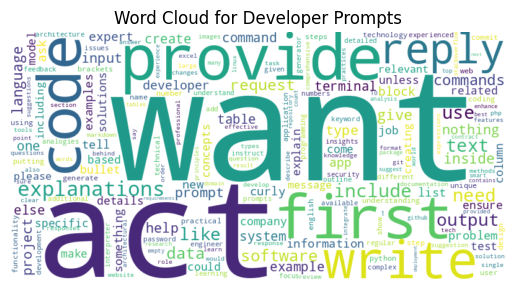

In [17]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Developer Prompts')
plt.show()

Using TikToken Library to get the token count so that we know the pricing.

In [18]:
import tiktoken

In [19]:
def cal_num_tokens_from_row(prompt, encoding_name: str) -> int:
    encoding = tiktoken.encoding_for_model(encoding_name)
    token_count = len(encoding.encode(prompt))
    return token_count

def cal_num_tokens_from_df(df, encoding_name: str) -> int:
    total_tokens = 0
    for prompt in df['prompt']:
        total_tokens += cal_num_tokens_from_row(prompt, encoding_name)
    return total_tokens

In [20]:
total_token = cal_num_tokens_from_df(target_df, 'gpt-3.5-turbo')
print(f'Total tokens in developer prompts: {total_token}')

Total tokens in developer prompts: 5883


Creating Dataset to feed into LLM

In [30]:
import csv
import os 
import random

In [33]:
rows = [{'text': row['act'].strip(), 
         'label': row['prompt'],
         } for _, row in df.iterrows()]

In [34]:
random.seed(42)
random.shuffle(rows)

In [50]:
num_test = 100
splits = {'test': rows[num_test:],
'train': rows[:num_test]}

In [46]:
import csv
import json
from pathlib import Path



In [53]:
import csv
import json
from pathlib import Path

def csv_to_toon(input_csv, output_toon):
    """
    Converts a CSV file with columns: act, prompt, for_devs
    into a .toon fine-tuning dataset with text + label pairs.
    """

    toon_entries = []

    with open(input_csv, 'r', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        for row in reader:
            act = row['act'].strip()
            prompt = row['prompt'].strip()
            for_devs = row.get('for_devs', '').strip().upper()

            # --- Create text and label ---
            text = f"Act as a {act}. {prompt}"
            if for_devs == "TRUE":
                label = (
                    f"As an experienced {act}, here’s a detailed technical solution with code, "
                    "best practices, and explanations based on the requirements."
                )
            else:
                label = f"As a {act}, provide a clear and helpful answer."

            # --- Convert into .toon structure ---
            toon_entry = {
                "messages": [
                    {"role": "system", "content": f"You are an expert {act}."},
                    {"role": "user", "content": text},
                    {"role": "assistant", "content": label}
                ]
            }
            toon_entries.append(toon_entry)

    # --- Write all entries to .toon file ---
    with open(output_toon, 'w', encoding='utf-8') as f:
        for entry in toon_entries:
            f.write(json.dumps(entry, ensure_ascii=False) + "\n")

    print(f"✅ Converted {len(toon_entries)} rows → {output_toon}")


# Example usage:
csv_to_toon("dataset/prompts.csv", "dataset/train.toon")


✅ Converted 220 rows → dataset/train.toon
